<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/Tugas_Week_2_Regression_Second_Hand_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elieser Pasaribu - 1103223209

# Tugas Week 2 - Deep Learning

# 📌  Membuat model MLP menggunakan Dataset Secondhanddataset.csv

# 1. Model PyTorch

# Install dan import Library

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from torch.utils.data import DataLoader, TensorDataset
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
import pandas as pd
path_dataset = '/content/secondhanddataset.csv'


In [ ]:
df = pd.read_csv(path_dataset)
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


# 1.Model MLP untuk Regresi (Prediksi Angka)

# Scaling Input & Output

In [ ]:
# Buat dataset regresi (prediksi angka)
from sklearn.datasets import make_regression # Import make_regression from sklearn.datasets
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)
y = y.reshape(-1, 1)  # Ubah ke bentuk kolom biar sesuai format PyTorch

# Pisah dataset jadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar skalanya seragam
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke format tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Masukkan ke DataLoader supaya lebih gampang di-training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [ ]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.hidden1 = nn.Linear(5, 32)  # Layer pertama: input 5 fitur, output 32 neuron
        self.hidden2 = nn.Linear(32, 16) # Layer kedua: dari 32 neuron ke 16 neuron
        self.output = nn.Linear(16, 1)   # Layer terakhir: hasilkan 1 angka (prediksi)

    def forward(self, x):
        x = F.relu(self.hidden1(x))  # Aktivasi ReLU di hidden layer 1
        x = F.relu(self.hidden2(x))  # Aktivasi ReLU di hidden layer 2
        x = self.output(x)  # Output akhir tanpa aktivasi (karena regresi)
        return x

# Buat model
model = MLPRegression()

# Training Model yang Sudah Dibuat

In [ ]:

criterion = nn.MSELoss()  # Loss function buat regresi
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizer Adam

# Training loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 11052.5195
Epoch 10, Loss: 441.5447
Epoch 20, Loss: 106.5631
Epoch 30, Loss: 77.1846
Epoch 40, Loss: 97.5751
Epoch 50, Loss: 79.3498
Epoch 60, Loss: 69.4462
Epoch 70, Loss: 85.4789
Epoch 80, Loss: 58.8355
Epoch 90, Loss: 80.3083


# Evaluasi Model

In [ ]:
import torch
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)

    # Konversi tensor ke numpy
    y_pred_np = y_pred.detach().cpu().numpy()
    y_test_np = y_test.detach().cpu().numpy()

    mse = mean_squared_error(y_test_np, y_pred_np)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_np, y_pred_np)

print(f"Loss pada data uji: {test_loss.item():.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Skor R^2: {r2:.4f}")

Loss pada data uji: 146.7866
MSE: 146.7866
RMSE: 12.1156
Skor R^2: 0.9877


# Visualisai Hasil

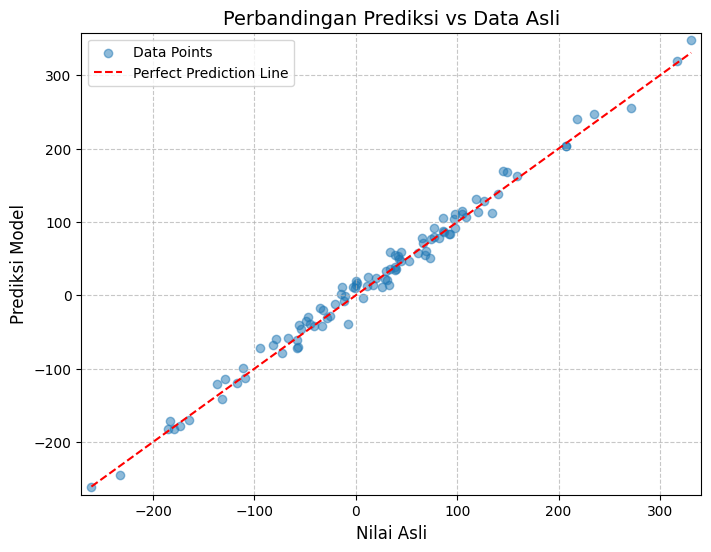

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.scatter(y_test_np, y_pred_np, alpha=0.5, label='Data Points') #Added label for the scatter plot
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--', label='Perfect Prediction Line') #Added label for the line
plt.xlabel("Nilai Asli", fontsize=12) # Increased font size for labels and title
plt.ylabel("Prediksi Model", fontsize=12)
plt.title("Perbandingan Prediksi vs Data Asli", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) #Added a grid for better readability
plt.legend() # Show the legend
plt.xlim(y_test_np.min()-10,y_test_np.max()+10) #Added xlim for better visualization
plt.ylim(y_pred_np.min()-10,y_pred_np.max()+10) #Added ylim for better visualization
plt.show()


# 2. MLP untuk Klasifikasi (Prediksi Kategori!)

In [ ]:
# Import the necessary function
from sklearn.datasets import make_classification

# Buat dataset klasifikasi dummy (binary classification)
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Pisah dataset jadi training & testing (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Masukkan ke DataLoader buat training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [ ]:
class MLPClassification(nn.Module):
    def __init__(self):
        super(MLPClassification, self).__init__()
        self.hidden1 = nn.Linear(5, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = torch.sigmoid(self.output(x))  # Pakai sigmoid buat output 0-1
        return x

model = MLPClassification()

# Training Model yang Sudah Dibuat

In [ ]:
criterion = nn.BCELoss()  # Binary Cross Entropy buat klasifikasi
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.3605
Epoch 10, Loss: 0.0876
Epoch 20, Loss: 0.1113
Epoch 30, Loss: 0.1240
Epoch 40, Loss: 0.1089
Epoch 50, Loss: 0.2166
Epoch 60, Loss: 0.3540
Epoch 70, Loss: 0.1703
Epoch 80, Loss: 0.0474
Epoch 90, Loss: 0.0145


In [ ]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Konversi ke 0 atau 1
    acc = (y_pred == y_test).float().mean()
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9400


# Visualisai Hasil

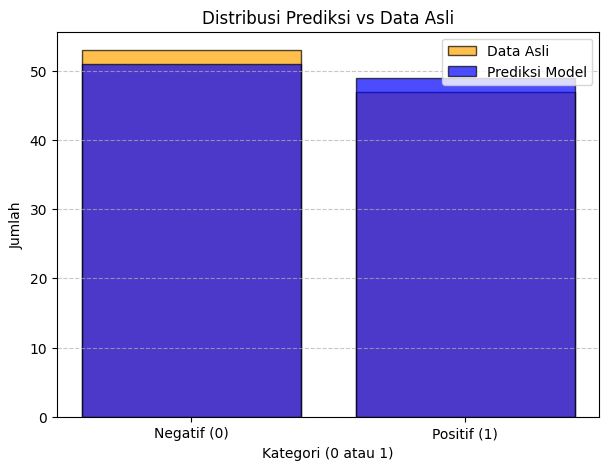

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(y_test.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Data Asli", color="orange", edgecolor="black", rwidth=0.8)
plt.hist(y_pred.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Prediksi Model", color="blue", edgecolor="black", rwidth=0.8)
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.xticks([0, 1], ["Negatif (0)", "Positif (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

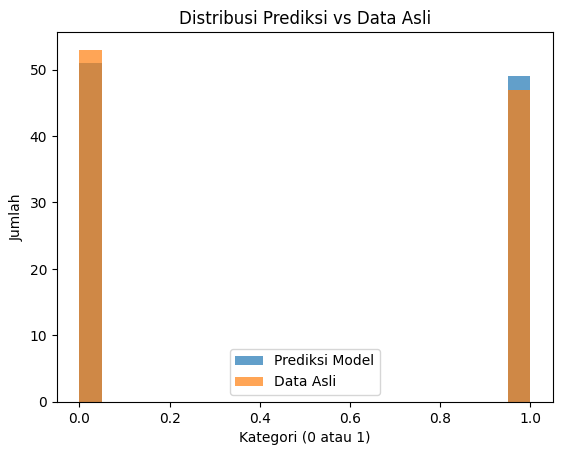

In [ ]:

plt.hist(y_pred.numpy(), bins=20, alpha=0.7, label="Prediksi Model")
plt.hist(y_test.numpy(), bins=20, alpha=0.7, label="Data Asli")
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.show()

# 2. Model TensorFlow

# Import Library

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Latih Model

In [ ]:
# Contoh dataset (regression)
X = np.random.rand(100, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(100) * 0.1  # Linear regression target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32).view(-1, 1), torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# MLP Model for Regression (PyTorch)
class MLPRegressor(nn.Module):
    def __init__(self, input_size):
        super(MLPRegressor, self).__init__()
        self.hidden = nn.Linear(input_size, 64)
        self.output = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

# Model, loss, optimizer
model = MLPRegressor(input_size=5)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

with torch.no_grad():
    y_pred_test = model(X_test).numpy()

mse = mean_squared_error(y_test.numpy(), y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test.numpy(), y_pred_test)

print(f'\nMSE: {mse}, \nRMSE: {rmse}, \nR^2: {r2}')

X_class = np.random.rand(200, 5)
y_class = (X_class[:, 0] + X_class[:, 1] > 1).astype(int)  # Biner klasifikasi

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

model_tf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(5,)),
    layers.Dense(1, activation='sigmoid')
])

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train_c, y_train_c, epochs=100, batch_size=10, verbose=1)

y_pred_class = (model_tf.predict(X_test_c) > 0.5).astype(int)
accuracy = accuracy_score(y_test_c, y_pred_class)
print(f'Accuracy: {accuracy}')

Epoch 0, Loss: 8.158003807067871
Epoch 100, Loss: 0.019894707947969437
Epoch 200, Loss: 0.0068332599475979805
Epoch 300, Loss: 0.006267865188419819
Epoch 400, Loss: 0.005979382898658514

MSE: 0.014625544659793377, 
RMSE: 0.12093611809460968, 
R^2: 0.9817295074462891


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4569 - loss: 0.7203
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5343 - loss: 0.6906
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.6697  
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.6479 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8306 - loss: 0.6248 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8808 - loss: 0.6095 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.5896 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8681 - loss: 0.5647 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8818 - loss: 0.5624 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9032 - loss: 0.5181 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.5187 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Accuracy: 0.95
